In [1]:
import xgboost as xgb
from xgboost import XGBClassifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, LeaveOneGroupOut, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('/Users/edatkinson/Repos/canDrivr-Indel/canDrivr/Annotated_data.csv',sep=',') 

data = data.drop(columns=['pos','ref_allele','alt_allele', 'WTtrinuc', 'mutTrinuc','mutant_AA','WT_AA'])
data = data.replace(np.nan, 0)

In [3]:
X = data.drop(columns=['driver_stat', 'chrom'])
y = data['driver_stat']
# X.columns = range(X.shape[1])

In [4]:


groups = data['chrom'] #For LOCO CV
xgb_model = XGBClassifier(objective='binary:logistic', eval_metric='logloss')

logo = LeaveOneGroupOut()
scores = cross_val_score(xgb_model, X, y, cv=logo, groups=groups, scoring='accuracy')
print(f"LOGO-CV accuracy scores for each group: {scores}")
print(f"Mean LOGO-CV accuracy: {np.mean(scores)}")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
y_test_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

print("Test Set Accuracy:", accuracy_score(y_test, y_pred))


print("Classification Report:\n", classification_report(y_test, y_pred))

LOGO-CV accuracy scores for each group: [0.7887931  0.7962963  0.77272727 0.81428571 0.78947368 0.82258065
 0.83333333 0.77678571 0.7826087  0.85416667 0.78383459 0.79850746
 0.68518519 0.82608696 0.78571429 0.82407407 0.79725086 0.83823529
 0.88235294 0.80701754 0.8452381  0.83333333]
Mean LOGO-CV accuracy: 0.8062673519794092
Test Set Accuracy: 0.8556085918854416
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86       434
           1       0.86      0.83      0.85       404

    accuracy                           0.86       838
   macro avg       0.86      0.85      0.86       838
weighted avg       0.86      0.86      0.86       838



In [11]:
feature_importance = xgb_model.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)
print(feat_imp_df)

                               Feature  Importance
1358                    phastCons17way    0.040460
1734                      4_Roll_slide    0.036011
1345  k36.Bismap.MultiTrackMappability    0.034485
1351    k24.Umap.MultiTrackMappability    0.026505
1353                    phastCons20way    0.024112
...                                ...         ...
609                          WT_AA_VAA    0.000000
608                            WT_AA_V    0.000000
607                       WT_AA_TYQIAK    0.000000
606                           WT_AA_TV    0.000000
1777                     4_Free_energy    0.000000

[1778 rows x 2 columns]


                               Feature  Importance
1358                    phastCons17way    0.040460
1734                      4_Roll_slide    0.036011
1345  k36.Bismap.MultiTrackMappability    0.034485
1351    k24.Umap.MultiTrackMappability    0.026505
1353                    phastCons20way    0.024112
...                                ...         ...
1671                           3_Slide    0.000142
1742             4_Purine_(AG)_content    0.000142
1567                      2_Roll_shift    0.000120
1590                           2_Wedge    0.000114
1679                     3_Twist_(RNA)    0.000103

[302 rows x 2 columns]


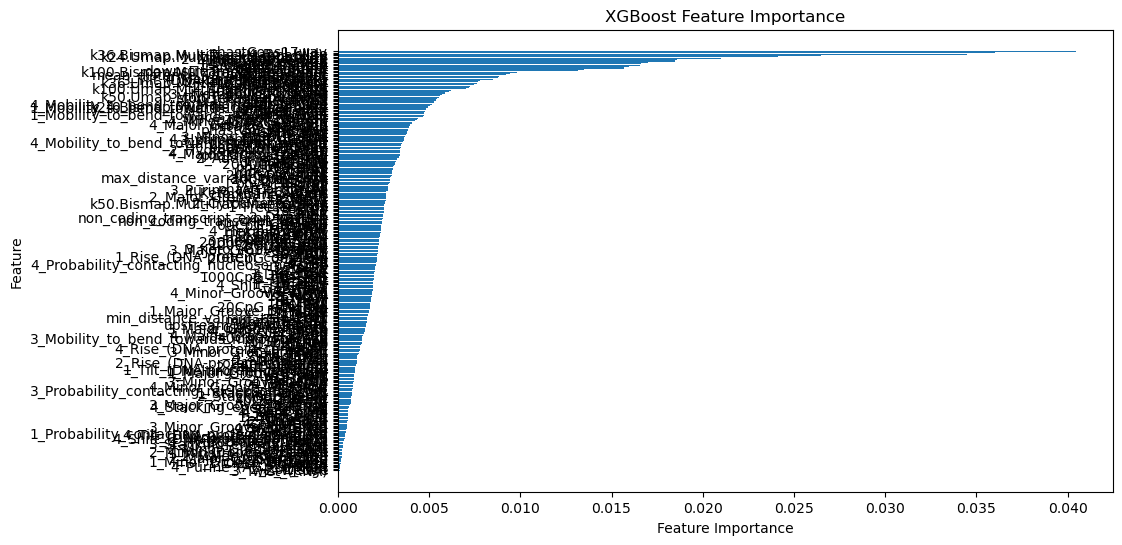

In [14]:
selected_features = feat_imp_df[feat_imp_df['Importance'] > 0.0001]
print(selected_features)
plt.figure(figsize=(10, 6))
plt.barh(selected_features['Feature'], selected_features['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [27]:
list_of_features = selected_features['Feature'].values.tolist()

def prepare_data(data, features):
    # data = data.drop(columns=['pos','ref_allele','alt_allele'])
    
    groups = data['chrom'] #For LOCO CV
    # groups = np.unique(groups)
    X = data[features]
    y = data['driver_stat']

    return X, y, groups

X, y, groups = prepare_data(data, list_of_features)


LOGO-CV accuracy scores for each group: [0.80172414 0.86111111 0.75757576 0.80714286 0.78947368 0.80645161
 0.83333333 0.80357143 0.80434783 0.8125     0.78853383 0.79850746
 0.7037037  0.84782609 0.78571429 0.86111111 0.80068729 0.76470588
 0.81372549 0.8245614  0.8452381  0.84166667]
Mean LOGO-CV accuracy: 0.8069642298550367
Test Set Accuracy: 0.8663484486873508
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       434
           1       0.88      0.84      0.86       404

    accuracy                           0.87       838
   macro avg       0.87      0.87      0.87       838
weighted avg       0.87      0.87      0.87       838

